In [1]:
import pandas as pd
import numpy as np
import os
import re
import sys
import datetime

sys.path.append('../python_scripts/')
sys.path.append('../ML')
from duolingo_hlr import *
from bulkTranslate import *

In [2]:
def test_hist_column(gota: pd.DataFrame):
    """Test whether performance columns exist in gota and create them else"""
    try:
        gota['seen_hist']
    except KeyError:
        print("Creating column 'seen_hist'")
        gota['seen_hist'] = 0    

    try:
        gota['right_hist']
    except KeyError:
        print("Creating column 'right_hist'")
        gota['right_hist'] = 0

    return gota

def update_performance(lipstick : pd.DataFrame, iw : str, perf : float):
    """Update times the entry iw was practice and the performance"""
    lipstick.loc[iw, 'history_seen'] += 1
    lipstick.loc[iw, 'history_correct']+= perf
    lipstick.loc[iw, 'p_recall'] = lipstick.loc[iw, 'history_seen'] / lipstick.loc[iw, 'history_correct']
    return lipstick

def update_timedelta(lipstick : pd.DataFrame, iw : str):
    """Update last practice timestamp and timedelta"""
    today = int(datetime.datetime.timestamp(datetime.datetime.today()))
    lipstick.loc[iw, 'timestamp'] = today
    lipstick.delta = lipstick.timestamp - lipstick.timestamp.min()
    return lipstick

# Import GOTA 

In [3]:
gota_path = '/Users/pabloherrero/Documents/ManHatTan/GOTAs/Die_Verwandlung.got'
gota = pd.read_csv(gota_path, index_col=0)
gota

,de,en,creation_time,seen_hist,right_hist
0,Ungeziefer,vermin,2020-03-22 17:39:12.011106,0,0.0
1,Versteifungen,stiffeners,2020-03-22 17:39:12.011106,2,2.0
2,Umfang,scope,2020-03-22 17:39:12.011106,3,1.0
3,flimmerten,flickered,2020-03-22 17:39:12.011106,0,0.0
4,versehen,isprovided,2020-03-22 17:39:12.011106,0,0.0
5,Fensterblech,Windowsheet,2020-03-22 17:39:12.011106,0,0.0
6,undurchführbar,impracticable,2020-03-22 17:39:12.011106,1,1.0
7,schaukelte,rocked,2020-03-22 17:39:12.011106,1,1.0
8,Jucken,itching,2020-03-22 17:39:12.011106,0,0.0
9,Pult,panel,2020-03-22 17:39:12.011106,0,0.0


In [4]:
iw, perf = 71, -1
gota['seen_hist'].loc[iw] += 1
gota['right_hist'].loc[iw] += perf

gota.iloc[iw-3:iw+2]

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,de,en,creation_time,seen_hist,right_hist
68,Einwirkungen,actions,2020-03-22 17:39:12.011106,1,1.0
69,entbehren,dispense,2020-03-22 17:39:12.011106,1,1.0
70,Trotz,Despite,2020-03-22 17:39:12.011106,1,-1.0
71,Entschlusse,resolve,2020-03-22 17:39:12.011106,2,0.0
72,unweigerlich,inevitably,2020-03-22 17:39:12.011106,1,1.0


In [ ]:
write_gota(gota_path, gota)

# Import LIPSTICK 

In [3]:
lippath = '../LIPSTICK/Die_Verwandlung.lip'

In [4]:
dapstep = pd.read_csv(lippath)
dapstep

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,word_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,p_pred
0,0.000000,1584895152,0,pablo,de,en,billigte,approved,lernt/lernen<vblex><pri><p3><sg>,0,0.0,0,0,0.9999
1,0.000000,1584895152,0,pablo,de,en,Krach,crash,lernt/lernen<vblex><pri><p3><sg>,0,0.0,0,0,0.9999
2,0.545455,1586190804,0,pablo,de,en,Einwände,objections,lernt/lernen<vblex><pri><p3><sg>,11,6.0,3,-1,0.9999
3,0.571429,1586177884,0,pablo,de,en,verzehrte,consumed,lernt/lernen<vblex><pri><p3><sg>,7,4.0,1,-1,0.9999
4,0.625000,1586183313,0,pablo,de,en,erzielten,achieved,lernt/lernen<vblex><pri><p3><sg>,8,5.0,0,0,0.9999
5,0.625000,1586109455,0,pablo,de,en,besänftigen,appease,lernt/lernen<vblex><pri><p3><sg>,8,5.0,2,0,0.9999
6,0.636364,1586200819,0,pablo,de,en,Ohnmacht,fainting,lernt/lernen<vblex><pri><p3><sg>,11,7.0,3,-1,0.9999
7,0.666667,1586192946,0,pablo,de,en,Umfang,scope,lernt/lernen<vblex><pri><p3><sg>,6,4.0,3,1,0.9999
8,0.666667,1586120925,0,pablo,de,en,verständigten,agreed,lernt/lernen<vblex><pri><p3><sg>,6,4.0,1,-1,0.9999
9,0.666667,1586168780,0,pablo,de,en,söhnte,reconciled,lernt/lernen<vblex><pri><p3><sg>,6,4.0,0,0,0.9999


## Update performance

In [7]:
dapstep.loc[iw, 'p_recall'] = dapstep.loc[iw, 'history_seen'] / dapstep.loc[iw, 'history_correct']
dapstep.loc[iw, 'p_recall']

NameError: name 'iw' is not defined

In [48]:
word, perf = 15, +1
dapstep = update_performance(dapstep, word , perf)
dapstep = update_timedelta(dapstep, word)

# dapstep.to_csv(lippath, index=False)
dapstep.loc[word]

p_recall                                            1
timestamp                                  1586245368
delta                                         1350216
user_id                                         pablo
learning_language                                  de
ui_language                                        en
lexeme_id                                feindseligem
word_id                                       hostile
lexeme_string        lernt/lernen<vblex><pri><p3><sg>
history_seen                                        2
history_correct                                     2
session_seen                                        0
session_correct                                     0
p_pred                                         0.9999
Name: 15, dtype: object

In [65]:
dapstep.to_csv(lippath, index=False)

## Train model with updated data

In [50]:
trainset, testset = read_data(lippath, method='hlr', omit_lexemes=False)

trainset += testset # Ignore the separation for the update

reading data...0...done!


In [51]:
model = SpacedRepetitionModel(method='hlr', omit_h_term=False, )
model.train(trainset)

In [52]:
model.weights

defaultdict(float,
            {'right': 0.02784770132540299,
             'wrong': 0.019897754497749814,
             'bias': 0.019030144128750696,
             'de:lernt/lernen<vblex><pri><p3><sg>': 0.019030144128750696})

In [53]:
trainset[0]

Instance(p=0.9999, t=5.97193287037037, fv=[('right', 1.4142135623730951), ('wrong', 1.0), ('bias', 1.0), ('de:lernt/lernen<vblex><pri><p3><sg>', 1.0)], h=274.0, a=0.6, lang='en->de', right=0.0, wrong=0.0, ts=1585411127, uid='pablo', lexeme='lernt/lernen<vblex><pri><p3><sg>', index=100)

In [54]:
trainset[1]

Instance(p=0.9999, t=0.0, fv=[('right', 1.7320508075688772), ('wrong', 1.0), ('bias', 1.0), ('de:lernt/lernen<vblex><pri><p3><sg>', 1.0)], h=0.010416666666666666, a=0.6666666666666666, lang='en->de', right=2.0, wrong=0.0, ts=1584895152, uid='pablo', lexeme='lernt/lernen<vblex><pri><p3><sg>', index=43)

In [55]:
prob = pd.Series({i.index: model.predict(i)[0] for i in trainset})
prob

100    0.020872
43     0.999900
28     0.020826
41     0.999900
2      0.001353
18     0.999900
103    0.022230
21     0.999900
66     0.000100
19     0.999900
29     0.999900
27     0.999900
48     0.999900
1      0.020868
101    0.001845
60     0.999900
23     0.001772
92     0.020822
22     0.999900
10     0.006026
35     0.999900
95     0.001616
33     0.999900
38     0.999900
63     0.999900
20     0.999900
24     0.002780
99     0.999900
12     0.003629
73     0.000100
         ...   
67     0.000134
5      0.000995
93     0.020817
62     0.000100
91     0.999900
34     0.999900
74     0.999900
50     0.999900
56     0.000878
0      0.999900
6      0.001262
25     0.001593
82     0.003188
51     0.021505
80     0.020882
68     0.000100
13     0.999900
97     0.003276
79     0.020937
78     0.999900
17     0.999900
84     0.020829
16     0.999900
87     0.001906
47     0.999900
76     0.001372
40     0.999900
53     0.000982
52     0.003366
59     0.006998
Length: 104, dtype: floa

In [66]:
dapstep.p_pred.update(prob)

dapstep.sort_values('p_pred', inplace=True)

dapstep

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,word_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,p_pred
57,1.000000,1585410291,515139,pablo,de,en,schaukelte,rocked,lernt/lernen<vblex><pri><p3><sg>,2,2.0,1,1,0.000100
65,1.000000,1585740039,844887,pablo,de,en,schluchzen,sob,lernt/lernen<vblex><pri><p3><sg>,1,1.0,0,0,0.000100
62,1.000000,1585675475,780323,pablo,de,en,gebührte,deserved,lernt/lernen<vblex><pri><p3><sg>,2,2.0,0,0,0.000100
66,1.000000,1585649015,753863,pablo,de,en,flimmerten,flickered,lernt/lernen<vblex><pri><p3><sg>,2,2.0,0,0,0.000100
68,1.000000,1585758034,862882,pablo,de,en,0.0olgedessen,"Asaresult,",lernt/lernen<vblex><pri><p3><sg>,1,1.0,0,0,0.000100
69,1.000000,1585411430,516278,pablo,de,en,Ungeziefer,vermin,lernt/lernen<vblex><pri><p3><sg>,1,1.0,0,0,0.000100
64,1.000000,1585411073,515921,pablo,de,en,Zeiger,pointer,lernt/lernen<vblex><pri><p3><sg>,1,1.0,0,0,0.000100
72,1.000000,1585736415,841263,pablo,de,en,Ungewißheit,uncertainty,lernt/lernen<vblex><pri><p3><sg>,1,1.0,0,0,0.000100
73,1.000000,1585816959,921807,pablo,de,en,ausgerückt,disengaged,lernt/lernen<vblex><pri><p3><sg>,1,1.0,0,0,0.000100
71,1.000000,1585785247,890095,pablo,de,en,ohnmachtähnlichen,faintingsimilar,lernt/lernen<vblex><pri><p3><sg>,1,1.0,0,0,0.000100


# Plot half times (dev)

In [66]:
lippath = '../LIPSTICK/Die_Verwandlung.lip'

In [13]:
dapstep = pd.read_csv(lippath)
dapstep

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,word_id,lexeme_string,history_seen,history_correct,session_seen,session_correct,p_pred
0,0.000000,1584895152,0,pablo,de,en,billigte,approved,lernt/lernen<vblex><pri><p3><sg>,0,0.0,0,0,0.9999
1,0.000000,1584895152,0,pablo,de,en,Krach,crash,lernt/lernen<vblex><pri><p3><sg>,0,0.0,0,0,0.9999
2,0.545455,1586190804,0,pablo,de,en,Einwände,objections,lernt/lernen<vblex><pri><p3><sg>,11,6.0,3,-1,0.9999
3,0.571429,1586177884,0,pablo,de,en,verzehrte,consumed,lernt/lernen<vblex><pri><p3><sg>,7,4.0,1,-1,0.9999
4,0.625000,1586183313,0,pablo,de,en,erzielten,achieved,lernt/lernen<vblex><pri><p3><sg>,8,5.0,0,0,0.9999
5,0.625000,1586109455,0,pablo,de,en,besänftigen,appease,lernt/lernen<vblex><pri><p3><sg>,8,5.0,2,0,0.9999
6,0.636364,1586200819,0,pablo,de,en,Ohnmacht,fainting,lernt/lernen<vblex><pri><p3><sg>,11,7.0,3,-1,0.9999
7,0.666667,1586192946,0,pablo,de,en,Umfang,scope,lernt/lernen<vblex><pri><p3><sg>,6,4.0,3,1,0.9999
8,0.666667,1586120925,0,pablo,de,en,verständigten,agreed,lernt/lernen<vblex><pri><p3><sg>,6,4.0,1,-1,0.9999
9,0.666667,1586168780,0,pablo,de,en,söhnte,reconciled,lernt/lernen<vblex><pri><p3><sg>,6,4.0,0,0,0.9999


In [62]:
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

In [63]:
jtplot.style('default', grid=False)

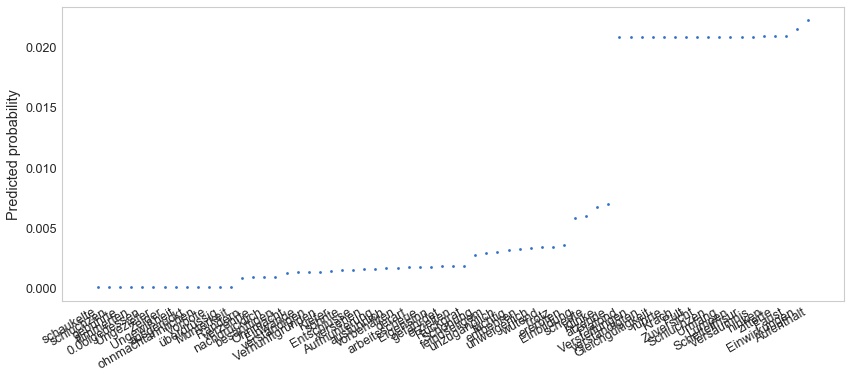

In [76]:
fig = plt.figure(figsize=(14,6))
x = dapstep.delta[dapstep.p_pred < 0.8]
x2 = dapstep.lexeme_id[dapstep.p_pred < 0.8]
y = dapstep.p_pred[dapstep.p_pred < 0.8]


plt.plot(x2, y, '.')
plt.ylabel('Predicted probability')
plt.gcf().autofmt_xdate()

In [83]:
dapstep[['lexeme_id', 'word_id', 'p_pred']]

,lexeme_id,word_id,p_pred
57,schaukelte,rocked,0.000100
65,schluchzen,sob,0.000100
62,gebührte,deserved,0.000100
66,flimmerten,flickered,0.000100
68,0.0olgedessen,"Asaresult,",0.000100
69,Ungeziefer,vermin,0.000100
64,Zeiger,pointer,0.000100
72,Ungewißheit,uncertainty,0.000100
73,ausgerückt,disengaged,0.000100
71,ohnmachtähnlichen,faintingsimilar,0.000100


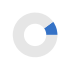

In [93]:
data = [0.1, 1-0.1]
fig, ax = plt.subplots(figsize=(1, 3), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=0, colors=['b', '0.9'])


In [98]:
Nwords

104

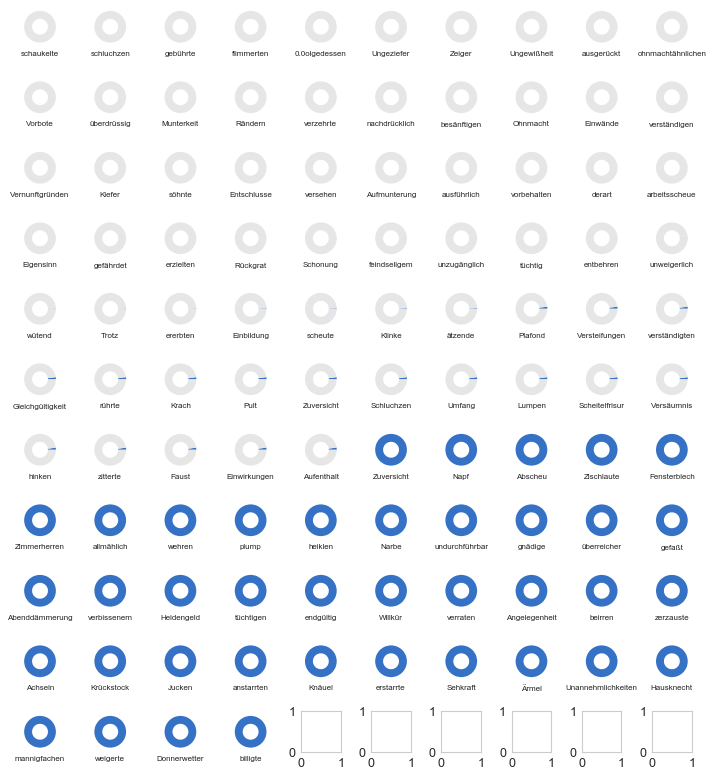

In [107]:
Nwords = len(dapstep)
ncols = 10
nrows = 11

fig, ax = plt.subplots(nrows, ncols, figsize=(10, nrows))#, subplot_kw=dict(aspect="equal"))
for i, (w,p) in enumerate(zip(dapstep.lexeme_id, dapstep.p_pred)):
    j, k = i//ncols, i%ncols
    wedges, texts = ax[j,k].pie([p, 1-p], wedgeprops=dict(width=0.5), startangle=0, colors=['b', '0.9'])
    ax[j,k].set_xlabel(w, fontsize=8)
plt.tight_layout()